# Desafio Final

## Atividades (Enunciado)

### 1. Acessar o link abaixo e realizar o download do arquivo “cars.csv”.

Fonte: https://drive.google.com/drive/folders/1nb7AcncQvt-OmGiTIe7TepBaaZn30ZXN?usp=sharing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cars.csv to cars.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_carros = pd.read_csv('cars.csv')
df_carros.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


### 3. Para as questões que envolvem a construção de modelos supervisionados, você deve utilizar o dataset original para definir a eficiência dos veículos. Além disso, deve utilizar as variáveis ['cylinders' ,'cubicinches' ,'hp' ,'weightlbs' ,'time-to-60'] como entrada. A saída deve ser a classificação de eficiência do veículo.

In [ ]:
entradas_arvore = np.array(df_carros[['cylinders' ,'cubicinches' ,'hp' ,'weightlbs' ,'time-to-60']])
saidas_arvore = np.array(df_carros['mpg'])

In [ ]:
entradas_arvore

array([[8, '350', 165, '4209', 12],
       [4, '89', 71, '1925', 14],
       [8, '302', 140, '3449', 11],
       ...,
       [6, '232', 112, '2835', 15],
       [6, '232', 100, '3288', 16],
       [6, '250', 105, '3353', 15]], dtype=object)

In [ ]:
saidas_arvore

array([14. , 31.9, 17. , 15. , 30.5, 23. , 13. , 14. , 25.4, 37.7, 34. ,
       34.3, 16. , 11. , 19.1, 16.9, 31.8, 16. , 24. , 24. , 37.2, 21.5,
       24. , 15.5, 38.1, 33. , 31. , 14. , 18. , 29.9, 27. , 16. , 23. ,
       21. , 30. , 22.4, 26. , 21.5, 16.5, 20.2, 16. , 14. , 18.5, 17.5,
       14. , 31.6, 13. , 22. , 29. , 20.2, 13. , 27.2, 14. , 24. , 16.5,
       16. , 19. , 33.5, 29. , 13. , 18. , 22. , 32.7, 46.6, 14. , 18.5,
       26. , 32. , 29.5, 17.5, 20. , 27. , 28. , 24. , 29. , 38. , 22.5,
       21.1, 26. , 32.4, 15.5, 12. , 19.2, 23. , 25. , 35. , 18. , 17.6,
       28. , 31. , 34.1, 27.2, 13. , 17. , 26. , 17. , 12. , 18. , 18.2,
       16. , 11. , 12. , 25. , 34.2, 32.2, 26.6, 43.4, 30. , 25. , 18. ,
       20. , 18. , 16. , 33. , 37.3, 18. , 24.5, 21. , 34.4, 15. , 27. ,
       26. , 16. , 23.2, 27. , 26.5, 13. , 30.9, 20. , 36.1, 26. , 28. ,
       12. , 17. , 15. , 16. , 26. , 13. , 22. , 21. , 26.8, 29. , 32. ,
       35.1, 19.2, 23. , 20.6, 27. , 15. , 18.1, 31

### 2. Para a implementação dos algoritmos, utilizear as definições abaixo:

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
normaliza = StandardScaler() #objeto para a normalização
pca = PCA(n_components=7)
kmeans = KMeans(n_clusters=3, random_state=42)
train_test_split(entradas_arvore, saidas_arvore, test_size=0.30, random_state=42)
arvore = DecisionTreeClassifier(random_state=42)
regressao_logistica = LogisticRegression(random_state=42)

## Pergunta 1

Após a utilização da biblioteca pandas para a leitura dos dados sobre os valores lidos, é CORRETO afirmar que:

R: Não foram encontrados valores nulos após a leitura dos dados.

In [ ]:
df_carros.isna().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

## Pergunta 2

Realize a transformação das colunas “cubicinches” e “weightlbs” do tipo “string” para o tipo numérico utilizando o pd.to_numeric(), utilizando o parâmetro  errors='coerce'. Após essa transformação, é CORRETO afirmar:

R: Essa transformação adiciona valores nulos ao nosso dataset.

In [ ]:
df_convertido = df_carros.copy()

In [ ]:
df_convertido['cubicinches'] = pd.to_numeric(df_carros['cubicinches'], errors='coerce')
df_convertido['weightlbs'] = pd.to_numeric(df_carros['weightlbs'], errors='coerce')

In [ ]:
df_convertido.isna().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

## Pergunta 3

Indique quais eram os índices dos valores presentes no dataset que “forçaram” o pandas a compreender a variável “cubicinches” como string.

In [ ]:
df_convertido[df_convertido['cubicinches'].isna()].index

Int64Index([40, 180], dtype='int64')

## Pergunta 4

Após a transformação das variáveis “string” para os valores numéricos, quantos valores nulos (células no dataframe) passaram a existir no dataset?

In [ ]:
df_convertido.isna().sum().sum()

5

## Pergunta 5

Substitua os valores nulos introduzidos no dataset, após a transformação, pelo valor médio das colunas. Qual é o novo valor médio da coluna “weightlbs”?

In [ ]:
df_preenchido = df_convertido.fillna(df_convertido.mean())

In [ ]:
df_preenchido.isna().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [ ]:
df_preenchido['weightlbs'].mean()

3009.8333333333335

## Pergunta 6

Após substituir os valores nulos pela média das colunas, selecione as colunas ['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']. Qual é o valor da mediana para a característica 'mpg'?

In [ ]:
df_colunas_numericas = df_preenchido[['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']]

df_colunas_numericas['mpg'].median()

22.0

## Pergunta 7

Qual é a afirmação CORRETA sobre o valor de 14,00 para a variável “time-to-60”?

R: 75% dos dados são maiores que o valor de 14,00.

In [ ]:
df_colunas_numericas['time-to-60'].quantile([.25, .5, .75])

0.25    14.0
0.50    16.0
0.75    17.0
Name: time-to-60, dtype: float64

## Pergunta 8

Sobre o coeficiente de correlação de Pearson entre as variáveis “cylinders” e “mpg”, é correto afirmar, EXCETO:

R: Mesmo não sendo igual a 1, é possível dizer que à medida em que a variável “cylinders” aumenta, a variável “mpg” também aumenta na mesma direção.

In [ ]:
cylinders = df_colunas_numericas['cylinders']
mpg = df_colunas_numericas['mpg']

In [ ]:
corr_cylinders_mpg = np.corrcoef(cylinders, mpg)[0, 1]
corr_cylinders_mpg

-0.7767098829879999

In [ ]:
r2_cylinders_mpg = corr_cylinders_mpg**2
r2_cylinders_mpg

0.6032782423312325

## Pergunta 9

Sobre o boxplot da variável “hp”, é correto afirmar, EXCETO:

R: Existe uma maior dispersão no segundo quartil quando comparamos
com o terceiro. (gabarito do desafio)

R: Cada um dos quartis possui a mesma quantidade de valores para a
variável “hp”. (na minha opinião, também está correta!)

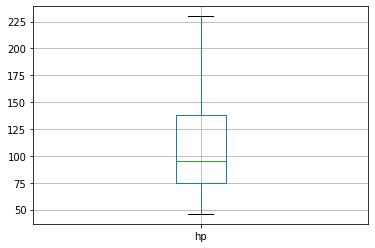

In [ ]:
df_colunas_numericas[['hp']].boxplot()

In [ ]:
df_colunas_numericas['hp'].quantile([.25, .5, .75]) 

0.25     75.0
0.50     95.0
0.75    138.0
Name: hp, dtype: float64

In [ ]:
df_colunas_numericas['quantiles'] = pd.qcut(df_colunas_numericas['hp'], 4, labels=False)

df_colunas_numericas.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,quantiles
0,14.0,8,350.0,165,4209.0,12,1972,3
1,31.9,4,89.0,71,1925.0,14,1980,0
2,17.0,8,302.0,140,3449.0,11,1971,3
3,15.0,8,400.0,150,3761.0,10,1971,3
4,30.5,4,98.0,63,2051.0,17,1978,0


In [ ]:
quantidades_quartis = df_colunas_numericas['quantiles'].value_counts().sort_index()
quantidades_quartis

0    66
1    71
2    59
3    65
Name: quantiles, dtype: int64

## Pergunta 10

Após normalizado, utilizando a função StandardScaler(), qual é o maior valor para a variável “hp”?

R: Existe uma maior dispersão no segundo quartil quando comparamos com o terceiro.

In [ ]:
df_normalizar = df_colunas_numericas.copy()

In [ ]:
df_normalizar.drop('quantiles', axis=1, inplace=True)

In [ ]:
scaler = normaliza.fit(df_normalizar.values)

In [ ]:
df_normalizado = scaler.transform(df_normalizar.values)

In [ ]:
df_normalizado = pd.DataFrame(df_normalizado, columns=df_normalizar.columns)

In [ ]:
df_normalizado['hp'].max()

3.05870398977614

## Pergunta 11

Aplicando o PCA, conforme a definição acima, qual é o valor da variância explicada pela primeira componente principal?

In [ ]:
principalComponents = pca.fit_transform(df_normalizado)

In [ ]:
pca.explained_variance_ratio_[0]

0.7237134885896341

## Pergunta 12

Utilize os três primeiros componentes principais para construir o K-means com um número de 3 clusters. Sobre os clusters, é INCORRETO afirmar que:

R: Todos os clusters possuem a mesma quantidade de elementos.

In [ ]:
df_principalComponents = pd.DataFrame(principalComponents)
df_principalComponents.head()

,0,1,2,3,4,5,6
0,3.485219,0.526326,-0.139738,0.258792,0.086902,-0.179206,0.079078
1,-2.176912,-0.285424,-1.304613,-0.100465,-0.289698,-0.041147,-0.013127
2,2.684973,1.046946,-0.732156,0.498227,-0.535168,-0.075745,0.159956
3,3.534648,0.847619,-0.801334,0.506630,-0.435696,-0.144237,-0.483162
4,-2.299222,0.194808,-0.221704,0.079650,-0.175655,0.015566,-0.069958


In [ ]:
df_principalComponents_3colunas = df_principalComponents.iloc[:,:3]
df_principalComponents_3colunas.columns = ['componente1', 'componente2', 'componente3']

In [ ]:
kmeans.fit(df_principalComponents_3colunas)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
df_principalComponents_3colunas['cluster'] = kmeans.labels_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_principalComponents_3colunas['cluster'].value_counts().sort_index()

0     77
1     75
2    109
Name: cluster, dtype: int64

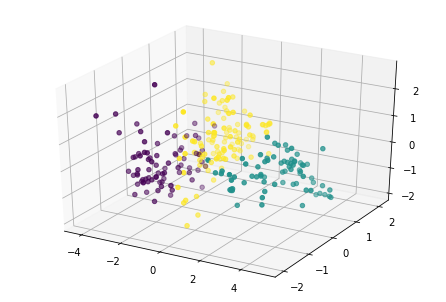

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

x = df_principalComponents_3colunas['componente1']
y = df_principalComponents_3colunas['componente2']
z = df_principalComponents_3colunas['componente3']
cluster = df_principalComponents_3colunas['cluster']

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=cluster)
plt.show()

## Pergunta 13

Após todo o processamento realizado nos itens anteriores, crie uma coluna que contenha a variável de eficiência do veículo. Veículos que percorrem mais de 25 milhas com um galão (“mpg”>25) devem ser considerados eficientes. Utilize as colunas ['cylinders'    ,'cubicinches' ,'hp' ,'weightlbs','time-to-60'] como entradas e como saída a coluna de eficiência criada.

Utilizando a árvore de decisão como mostrado, qual é a acurácia do modelo?

In [ ]:
df_normalizado.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,-1.171127,1.393053,1.372393,1.450681,1.414997,-1.221287,-1.327539
1,1.121226,-0.919105,-1.030290,-0.874768,-1.280086,-0.532829,0.875880
2,-0.786934,1.393053,0.930520,0.832210,0.518209,-1.565516,-1.602966
3,-1.043063,1.393053,1.832677,1.079598,0.886364,-1.909745,-1.602966
4,0.941936,-0.919105,-0.947439,-1.072679,-1.131408,0.499857,0.325025


In [ ]:
entradas_arvore = np.array(df_preenchido[['cylinders' ,'cubicinches' ,'hp' ,'weightlbs' ,'time-to-60']])
saidas_arvore = np.array(df_preenchido['mpg'] > 25).astype(int)

In [ ]:
entradas_arvore

array([[8.000e+00, 3.500e+02, 1.650e+02, 4.209e+03, 1.200e+01],
       [4.000e+00, 8.900e+01, 7.100e+01, 1.925e+03, 1.400e+01],
       [8.000e+00, 3.020e+02, 1.400e+02, 3.449e+03, 1.100e+01],
       ...,
       [6.000e+00, 2.320e+02, 1.120e+02, 2.835e+03, 1.500e+01],
       [6.000e+00, 2.320e+02, 1.000e+02, 3.288e+03, 1.600e+01],
       [6.000e+00, 2.500e+02, 1.050e+02, 3.353e+03, 1.500e+01]])

In [ ]:
saidas_arvore

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(entradas_arvore, saidas_arvore, test_size=0.30, random_state=42)

In [ ]:
arvore.fit(X_train, y_train)
y_arvore_pred = arvore.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acuracia_arvore = accuracy_score(y_test, y_arvore_pred)
acuracia_arvore

0.8734177215189873

## Pergunta 14

Sobre a matriz de confusão obtida após a aplicação da árvore de decisão, como mostrado anteriormente, é INCORRETO afirmar:

R: Existem duas vezes mais veículos considerados não eficientes que instâncias de veículos eficientes.

In [ ]:
real = pd.Series(y_test).value_counts().sort_index()
real

0    41
1    38
dtype: int64

In [ ]:
previsto = pd.Series(y_arvore_pred).value_counts().sort_index()
previsto

0    35
1    44
dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_arvore_pred)

array([[33,  8],
       [ 2, 36]])

In [ ]:
previsto[0] > (real[1] * 2)

False

## Pergunta 15

Utilizando a mesma divisão de dados entre treinamento e teste empregada para a análise anterior, aplique o modelo de regressão logística como mostrado na descrição do trabalho.

Comparando os resultados obtidos com o modelo de árvore de decisão, é INCORRETO afirmar que:

R: A regressão logística não deveria ser aplicada ao problema, pois ela trabalha apenas com dados categóricos.

In [ ]:
regressao_logistica.fit(X_train, y_train)
y_rl_pred = regressao_logistica.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
acuracia_rl = accuracy_score(y_test, y_rl_pred)
acuracia_rl

0.8607594936708861

In [ ]:
(acuracia_arvore, acuracia_rl)

(0.8734177215189873, 0.8607594936708861)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor